In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from six.moves import urllib    
from torch import nn
import torch.nn.functional as F
from torch import optim
from torchvision import models
import cv2

#from torchsummary import summary

In [2]:
#import shutil
#import os
    
#source_dir = 'simpsons/train/principal_skinner'
#target_dir = 'simpsons/val/principal_skinner'
    
#file_names = os.listdir(source_dir)
#tot = len(file_names)
#count = 0
#for file_name in file_names:
 #   shutil.move(os.path.join(source_dir, file_name), target_dir)
  #  count+=1
   # if count>= (tot*0.2):
    #    break

In [3]:
#print(tot)

In [4]:
#define a transform to normalize data
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
#0.485, 0.456, 0.406 and 0.229, 0.224, 0.225 is requirement of pretrained model

val_transform = transforms.Compose([transforms.Resize(225),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

#download and load training data
trainset = datasets.ImageFolder('E:/OpenCV/simpsons/train/', transform = train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

#download and load val data
valset = datasets.ImageFolder('E:/OpenCV/simpsons/val/', transform = val_transform)
valloader = torch.utils.data.DataLoader(valset, batch_size = 32, shuffle=True)

In [5]:
trainset

Dataset ImageFolder
    Number of datapoints: 11039
    Root location: E:/OpenCV/simpsons/train/
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=(-30, 30), resample=False, expand=False)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [6]:
valset

Dataset ImageFolder
    Number of datapoints: 2772
    Root location: E:/OpenCV/simpsons/val/
    StandardTransform
Transform: Compose(
               Resize(size=225, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [7]:
print(trainloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>
torch.Size([64, 3, 224, 224])
torch.Size([64])
tensor(4)
tensor(4)
tensor(9)
tensor(7)


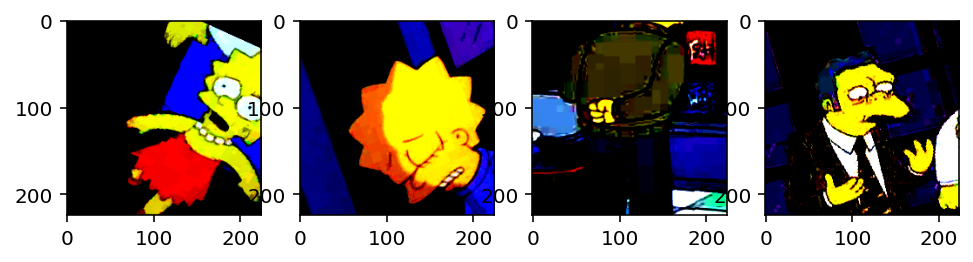

In [8]:
#checking training data
dataiter = iter(trainloader)
image, labels = dataiter.next()
print(type(image))
print(image.shape)
print(labels.shape)
fig = plt.figure(figsize = (8, 8))
for i in range(4):
    fig.add_subplot(1, 4, i+1)
    img = image[i]
    img = img.permute(1,2,0)
    plt.imshow(img)
    print(labels[i])

In [9]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>
torch.Size([32, 3, 224, 224])
torch.Size([32])
tensor(7)
tensor(8)
tensor(1)
tensor(1)


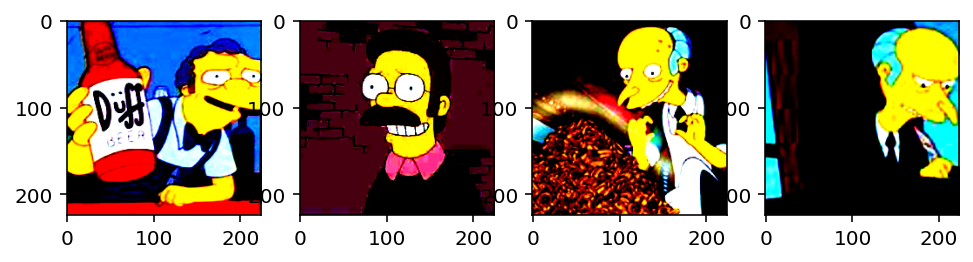

In [10]:
#checking val data
dataiter = iter(valloader)
image1, labels1 = dataiter.next()
print(type(image1))
print(image1.shape)
print(labels1.shape)
fig = plt.figure(figsize = (8, 8))
for i in range(4):
    fig.add_subplot(1, 4, i+1)
    img1 = image1[i]
    img1 = img1.permute(1,2,0)
    plt.imshow(img1)
    print(labels1[i])

In [11]:
labels1.unique()

tensor([0, 1, 2, 3, 5, 6, 7, 8, 9])

In [25]:
#importing model
model = models.densenet121(pretrained=True)
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [26]:
#freezing feature parameters/turining off gradient
for param in model.parameters():
    param.requires_grad = False

#defining a new classifier
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(1024, 50)),
    ('relu', nn.ReLU()),
    ('Dropout', nn.Dropout(p=0.2)),
    ('fc2', nn.Linear(50, 10)),
    ('output', nn.LogSoftmax(dim = 1))
]))

#attaching new classifier to model
#model.classifier due to this last line (classifier): Linear(in_features=1024, out_features=1000, bias=True)
model.classifier = classifier

In [27]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [30]:
#training
import time
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr = 0.0005) #since we only want to update parameters for classifier

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
epochs = 10
step = 1
running_loss = 0
print_every = 50
for e in range(epochs):
    for images, labels in trainloader:
        #images, labels = Variable(images), Variable(labels)
        step+=1
    
        model = model.to(device)
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
    
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if step % print_every ==0:
            model.eval()
            val_loss = 0
            accuracy = 0
            
            for images1, labels1 in valloader:
                images1 = images1.to(device)
                labels1 = labels1.to(device)
                
                output1 = model(images1)
                loss1 = criterion(output1, labels1)
                val_loss +=loss1.item()
                
                #calculate accuracy
                ps = torch.exp(output1)
                top_ps, top_class =ps.topk(1, dim = 1)
                equality = top_class == labels1.view(*top_class.shape)
                accuracy += torch.mean(equality.type(torch.FloatTensor))
                
            print(f'Epoch:{e}...'
                 f'Train Loss: {running_loss/print_every:.3f}...'
                 f'VAL Loss: {val_loss/len(valloader):.3f}...'
                 f'VAL Accuracy: {accuracy/len(valloader):.3f}...')
            
        running_loss = 0
        model.train()

Epoch:0...Train Loss: 0.021...VAL Loss: 0.877...VAL Accuracy: 0.728...
Epoch:0...Train Loss: 0.024...VAL Loss: 0.827...VAL Accuracy: 0.743...
Epoch:0...Train Loss: 0.027...VAL Loss: 0.850...VAL Accuracy: 0.732...
Epoch:1...Train Loss: 0.024...VAL Loss: 0.833...VAL Accuracy: 0.740...
Epoch:1...Train Loss: 0.018...VAL Loss: 0.840...VAL Accuracy: 0.734...
Epoch:1...Train Loss: 0.025...VAL Loss: 0.842...VAL Accuracy: 0.734...
Epoch:2...Train Loss: 0.024...VAL Loss: 0.835...VAL Accuracy: 0.733...
Epoch:2...Train Loss: 0.024...VAL Loss: 0.825...VAL Accuracy: 0.734...
Epoch:2...Train Loss: 0.021...VAL Loss: 0.818...VAL Accuracy: 0.741...
Epoch:2...Train Loss: 0.018...VAL Loss: 0.833...VAL Accuracy: 0.736...
Epoch:3...Train Loss: 0.024...VAL Loss: 0.821...VAL Accuracy: 0.742...
Epoch:3...Train Loss: 0.021...VAL Loss: 0.806...VAL Accuracy: 0.744...
Epoch:3...Train Loss: 0.017...VAL Loss: 0.826...VAL Accuracy: 0.731...
Epoch:4...Train Loss: 0.021...VAL Loss: 0.835...VAL Accuracy: 0.733...
Epoch:

KeyboardInterrupt: 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device